<a href="https://colab.research.google.com/github/Sanjay05-coder/ANN-Classification-of-Bank-Churn-Synthetic-Data-/blob/main/ANN_Classification_of_Bank_Churn_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf #Import the core tensorflow library
from tensorflow import keras #Import the Keras API, whihx is now the official high-level API for building and training deep learning models in Tensorflow
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import pandas as pd

In [3]:
df=pd.read_csv("/content/Dataset.csv.zip")

In [11]:
df.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,...,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824,68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0


In [6]:
len(df.columns)

25

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             175028 non-null  int64  
 1   CreditScore         175028 non-null  float64
 2   Age                 175028 non-null  float64
 3   Tenure              175028 non-null  float64
 4   Balance             175028 non-null  float64
 5   NumOfProducts       175028 non-null  float64
 6   HasCrCard           175028 non-null  int64  
 7   IsActiveMember      175028 non-null  int64  
 8   EstimatedSalary     175028 non-null  float64
 9   Exited              175028 non-null  int64  
 10  Surname_tfidf_0     175028 non-null  float64
 11  Surname_tfidf_1     175028 non-null  float64
 12  Surname_tfidf_2     175028 non-null  float64
 13  Surname_tfidf_3     175028 non-null  float64
 14  Surname_tfidf_4     175028 non-null  float64
 15  France              175028 non-nul

In [7]:
df['Exited'].unique()
# Exited
# 1-> yes
# 2-> No

array([0, 1])

In [8]:
df.isnull().sum()# no missing vals

,0
Surname,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0


#Create The feature and Target

In [13]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#Create Neural Network

In [18]:
input_dim = X_train_scaled.shape[1]

input_dim

24

In [20]:
model=keras.Sequential([
    layers.Dense(input_dim,activation='relu',input_shape=(input_dim,)),
    layers.Dense(1,'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compile model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


#Train The model

In [22]:
created_model = model.fit(X_train_scaled,y_train,epochs = 100,batch_size=32,validation_split=0.2)

Epoch 1/100
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8127 - loss: 0.4326 - val_accuracy: 0.8414 - val_loss: 0.3716
Epoch 2/100
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8471 - loss: 0.3568 - val_accuracy: 0.8517 - val_loss: 0.3468
Epoch 3/100
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8533 - loss: 0.3448 - val_accuracy: 0.8574 - val_loss: 0.3398
Epoch 4/100
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8554 - loss: 0.3392 - val_accuracy: 0.8582 - val_loss: 0.3410
Epoch 5/100
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8588 - loss: 0.3355 - val_accuracy: 0.8582 - val_loss: 0.3369
Epoch 6/100
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8586 - loss: 0.3315 - val_accuracy: 0.8583 - val_loss: 0.3380
Epoch 7/100
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8609 - loss: 0.3290 - val_accuracy: 0.8602 - val_loss: 0.3347
Epoch 8/100
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8608 - loss: 0

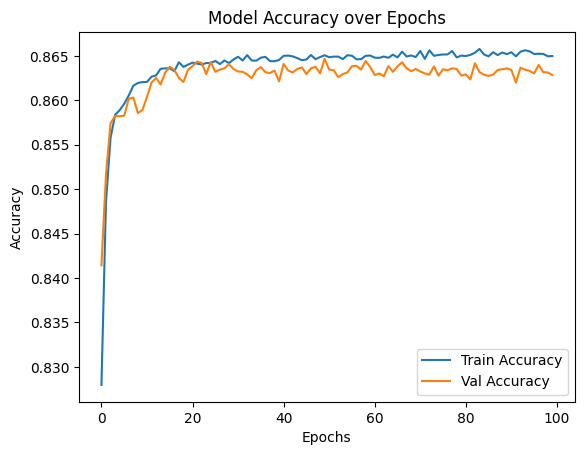

In [23]:
# Plot accuracy
import matplotlib.pyplot as plt # Import pyplot
plt.plot(created_model.history['accuracy'], label='Train Accuracy') # Access history correctly
plt.plot(created_model.history['val_accuracy'], label='Val Accuracy') # Access history correctly
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Evalue the model

In [24]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8599 - loss: 0.3254

Test Accuracy: 0.8642


#Confusion Matrix

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step

Confusion Matrix:
[[26057  1549]
 [ 3205  4195]]


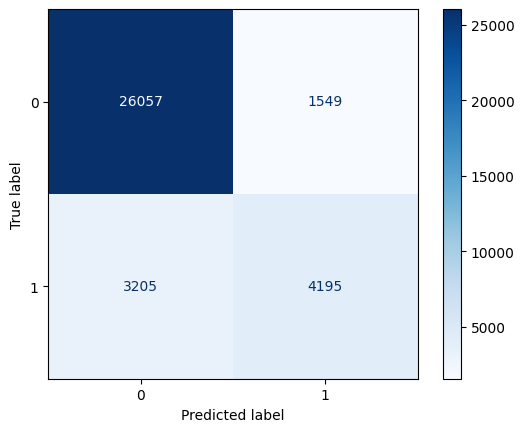

In [25]:
# Predict
y_pred = (model.predict(X_test_scaled)>0.5 ).astype("int32")
#Any probability score greater than 0.5 is evaluated as True.
#For normal binary classification the set threshold is 0.5 , you can refer to logistics regression notes for details

# Show metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
display_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),display_labels=y.unique())
display_cm.plot(cmap='Blues')

#Predicting New Data

In [28]:
new_sample=[[3021,715,42,6,84572.33,2,1,0,129874.56,0,0.12,0.03,0.07,0.01,0.05,1,0,0,0,1,1.5,511225.0,252,10584]]

Process the new sample scale

In [29]:
new_samples_scale = scaler.transform(new_sample)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


#Predict the output with the trained model

In [30]:
#Predict
prediction = model.predict(new_samples_scale)
prediction_label = (prediction > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [31]:
#Interpret the results

if prediction_label[0][0] == 1:
  print("Prediction : Exited")
else:
  print("Prediction : Not Exited")

Prediction : Exited
